In [1]:
# set dependencies
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import time
import gmaps

from pprint import pprint
from scipy import stats
from scipy.stats import linregress
from citipy import citipy

# Set options
pd.options.display.max_rows=601
pd.set_option("precision", 2)
from api_keys import fbi_key

In [2]:
# scatter plot function
def sbc_plot_scatter(df,col1,col2,title,file):
    x=df[col1].astype('float') # Key error is argument conflict
    y=df[col2].astype('float') # Key error is argument conflict     
    (slope,intercept,rvalue,pvalue,stderr)=stats.linregress(x,y)
    fit=x*slope+intercept
    line='y = '+str(round(slope,2))+'x + '+str(round(intercept,2))
    x_min=round(df[col1].min()/10)*10 # key error
    x_max=(round(df[col1].max()/10)*10)+10 # key error
    plt.xticks(np.arange(x_min,x_max,10))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(b=True)
    plt.scatter(x,y)
    plt.title(title)
    plt.plot(x,fit,color='red')
    plt.annotate(line,(47,10),color='red',xycoords='figure pixels')
    plt.annotate((f"R squared: {round((rvalue**2),2)}"),(299,10),color='red',xycoords='figure pixels')
    plt.savefig(f'dataFiles/output/{file}.png') # must conform to your local repo file path or get file or directory not found
                                                # error
    
# how to call the function:
# sbc_plot_scatter(df_name,'<col1_header>','<col2_header>','<your title text>','<your_output_file_name')
#                  no quotes,rest use quotes-----------------------------------------------------------|
# Key errors indicate the function call could not find the column in the dataframe
# syntax errors indicate missing commas or quotes
# attribute errors indicate the df_name item is not a DataFrame object

In [4]:
# Create dataframe from csv - This csv is the list of winners of post season NFL games 1970-2021.
winners_data = "dataFiles/Post_season_NFL_winners_1971_2021.csv"
winners_df = pd.read_csv(winners_data)
winners_df.head(5)

,sequence,Season from,Season to,Winner,Winning Score,Losing Score,Score Differential,Overtime,Field Goal or Less,Super Bowl Appearances,Division,Game Rank,Date
0,0,1970,1971,Baltimore Colts,17,0,17,0,False,2,AFC,playoff,NaN
1,1,1970,1971,Oakland Raiders,21,14,7,0,False,5,AFC,playoff,NaN
2,2,1971,1972,Miami Dolphins,27,24,3,2,True,5,AFC,playoff,NaN
3,3,1971,1972,Baltimore Colts,20,3,17,0,False,2,AFC,playoff,NaN
4,4,1972,1973,Pittsburgh Steelers,13,7,6,0,False,8,AFC,playoff,NaN


### Test the function - this graph is meaningless but demonstrates the function as a quick check for any possible relationship between two numerical columns of a dataframe.

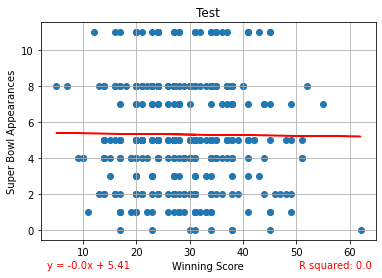

In [51]:
#sbc_plot_scatter(winners_df,'Winning Score','Super Bowl Appearances','Test','test_file') - Shows single and double quote.
#                                                                                           mixing quotes gives syntax error
sbc_plot_scatter(winners_df,"Winning Score","Super Bowl Appearances","Test","test_file")

In [17]:
#gather data - Use API or import files and convert to dataframe
#ADD your url
#ADD your filepath (remember to push your file to the branch)

base_url = 'https://api.usa.gov/crime/fbi/sapi'
#url = f'https://api.usa.gov/crime/fbi/sapi/api/nibrs/aggravated-assault/victim/national/age?API_KEY={fbi_key}'
#url = f'https://api.usa.gov/crime/fbi/sapi/api/summarized/state/CO/violent-crime/2000/2019?API_KEY={fbi_key}'
#url = f'https://api.usa.gov/crime/fbi/sapi/api/nibrs/homicide/offense/national/count?API_KEY={fbi_key}'
url = f'https://api.usa.gov/crime/fbi/sapi/api/summarized/estimates/national/1970/2021?API_KEY={fbi_key}'
response=requests.get(url).json()
response

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 764057,
   'property_crime': 8024115,
   'burglary': 1587564,
   'larceny': 5723488,
   'motor_vehicle_theft': 713063,
   'arson': 44059},
  {'state_id': None,
   'state_abbr': '',
   'year': 1985,
   'population': 237923795,
   'violent_crime': 1327767,
   'homicide': 18976,
   'rape_legacy': 87671,
   'rape_revised': None,
   'robbery': 497874,
   'aggravated_assault': 723246,
   'property_crime': 11102590,
   'burglary': 3073348,
   'larceny': 6926380,
   'motor_vehicle_theft': 1102862,
   'arson': 103698},
  {'state_id': None,
   'state_abbr': '',
   'year': 2000,
   'population': 281421906,
   'violent_crime': 1425486,
   'homicide': 15586,
   'rape_legacy': 90178,
   'rape_revised': None,
   'robbery': 408016,
   'aggravated_assault': 9

## CLEAN DATA

## PROCESS DATA

## ANALYZE RESULTS

## DETERMINE TRENDS

## COMPILE CONCLUSIONS

## FORMULATE RECOMMENDATIONS

### Summary